#### Time Series Analysis in Python with Manufacturers’ Shipments

##### Import relevant libraries

In [1]:
import pandas as pd

#### Load the datasets

In [2]:
df = pd.read_csv('UMTMVS.csv')
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


#### Index the date column

In [3]:
df = pd.read_csv('UMTMVS.csv', index_col='DATE')
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


#### Check to see if pandas is dealing with the index as simple objects or pandas built-in DateTime datatype

In [4]:
df.index 

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
       '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01'],
      dtype='object', name='DATE', length=343)

#### Convert from simple objects into DateTime

In [5]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01'],
              dtype='datetime64[ns]', name='DATE', length=343, freq=None)

#### Automatically use index as dates in Pandas

In [6]:
df = pd.read_csv('UMTMVS.csv', index_col='DATE', parse_dates=True)
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01'],
              dtype='datetime64[ns]', name='DATE', length=343, freq=None)

##### Indexing in Time-Series Data

In [7]:
df.loc['1992-01-01':'2020-01-01':12]

,UMTMVS
DATE,
1992-01-01,209438.0
1993-01-01,223258.0
1994-01-01,234097.0
1995-01-01,260175.0
1996-01-01,263041.0
1997-01-01,280870.0
1998-01-01,290004.0
1999-01-01,293222.0
2000-01-01,314656.0


#### Time-Resampling

In [8]:
# calculate the mean value of shipment at the start of every year.
df.resample(rule='AS').mean().head()

,UMTMVS
DATE,
1992-01-01,242002.000000
1993-01-01,251708.083333
1994-01-01,269842.666667
1995-01-01,289973.083333
1996-01-01,299765.666667


#### Rolling Time Series

In [9]:
# calculate the rolling average of 10 days
df.rolling(window=10).mean().head(20) # head to see first 20 values

,UMTMVS
DATE,
1992-01-01,NaN
1992-02-01,NaN
1992-03-01,NaN
1992-04-01,NaN
1992-05-01,NaN
1992-06-01,NaN
1992-07-01,NaN
1992-08-01,NaN
1992-09-01,NaN


In [10]:
# The maximum value from a window of 30 days
df.rolling(window=30).max()[30:].head(20) # head is just to check top 20 values

,UMTMVS
DATE,
1994-07-01,287336.0
1994-08-01,287336.0
1994-09-01,291357.0
1994-10-01,291357.0
1994-11-01,291357.0
1994-12-01,291357.0
1995-01-01,291357.0
1995-02-01,291357.0
1995-03-01,303201.0


#### Plotting Time-series Data using Pandas

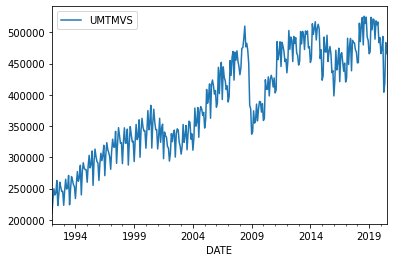

In [11]:
df.plot()

[Text(0, 0.5, 'Value'), Text(0.5, 1.0, 'Value of Manufacturers Shipments')]

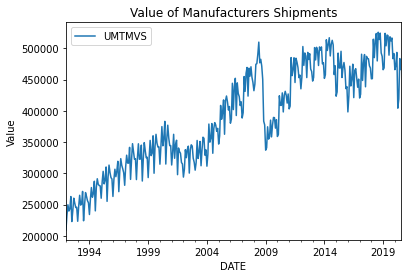

In [12]:
ax = df.plot()
ax.set(title='Value of Manufacturers Shipments', ylabel='Value')

[Text(0, 0.5, 'Value'), Text(0.5, 1.0, 'Value of Manufacturers Shipments')]

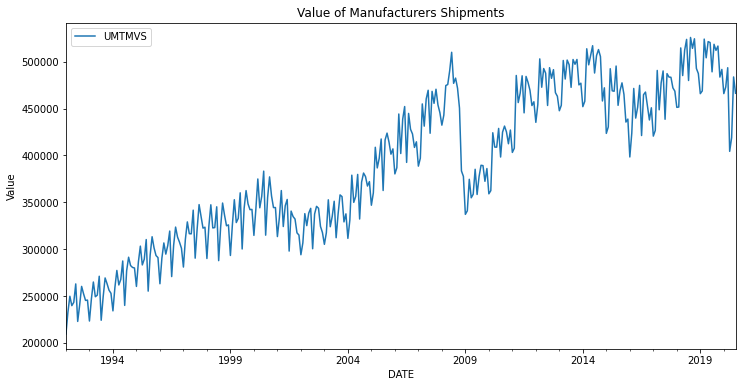

In [13]:
# Include plot size
ax = df.plot(figsize=(12,6))
ax.set(title='Value of Manufacturers Shipments', ylabel='Value')

[Text(0, 0.5, 'Value of Mean of Starting of Year'),
 Text(0.5, 1.0, 'Average of Manufacturers Shipments')]

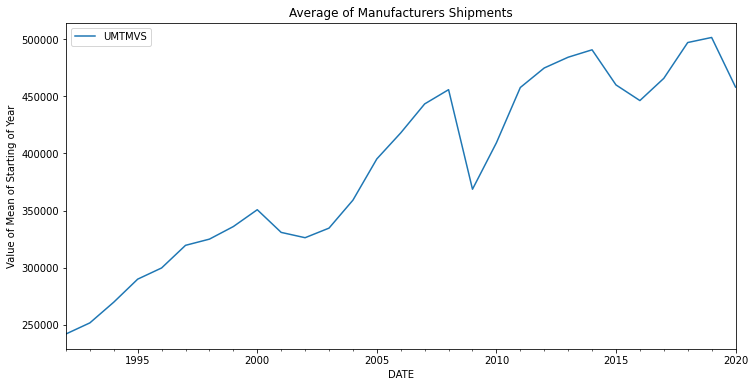

In [14]:
# Plot the mean of the starting value of every year
ax = df.resample(rule='AS').mean().plot(figsize=(12,6))
ax.set(title='Average of Manufacturers Shipments', ylabel='Value of Mean of Starting of Year')

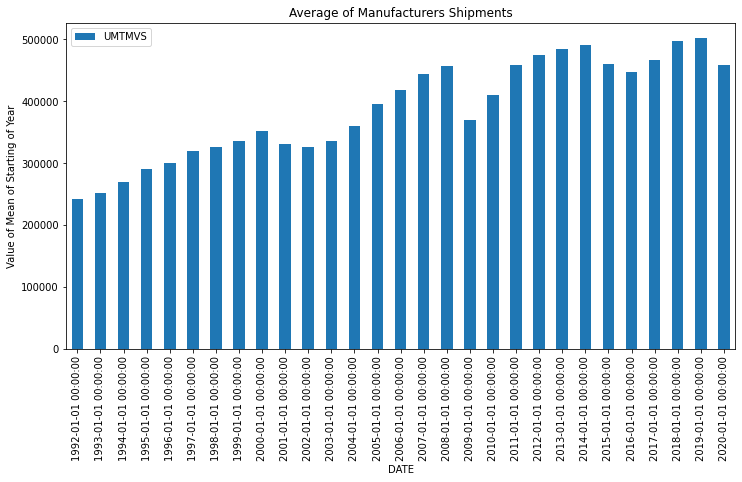

In [15]:
# Bar plot for the mean of starting of every year
ax = df.resample(rule='AS').mean().plot.bar(figsize=(12,6))
ax.set(title='Average of Manufacturers Shipments', ylabel='Value of Mean of Starting of Year');

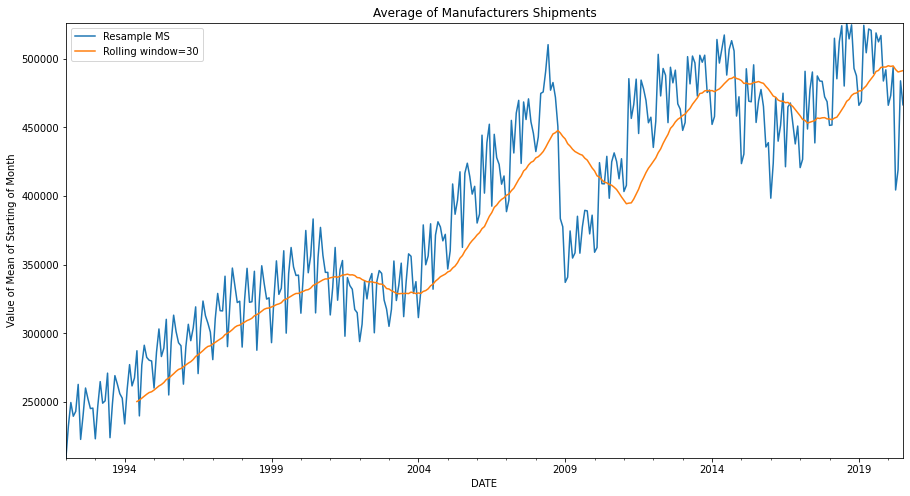

In [16]:
# Plot the rolling mean and normal mean for the starting of the month
ax = df['UMTMVS'].resample(rule='MS').mean().plot(figsize=(15,8), label='Resample MS')
ax.autoscale(tight=True)
df.rolling(window=30).mean()['UMTMVS'].plot(label='Rolling window=30')

ax.set(ylabel='Value of Mean of Starting of Month',title='Average of Manufacturers Shipments')
ax.legend()

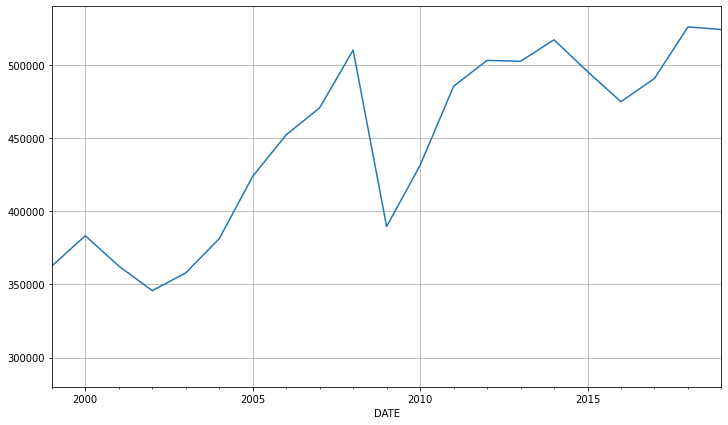

In [17]:
# Plot the maximum values for the start of every year from 1999 till 2019
ax = df['UMTMVS'].resample(rule='AS').max().plot(xlim=["1999-01-01","2019-01-01"],ylim=[280000,540000], figsize=(12,7))
ax.yaxis.grid(True)
ax.xaxis.grid(True)